In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [16]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

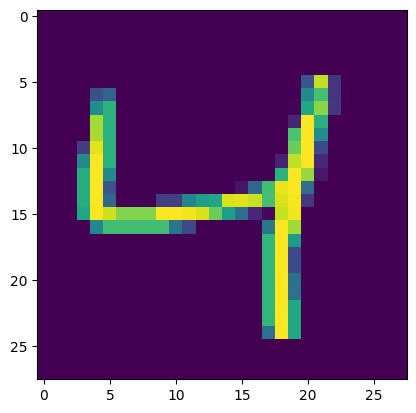

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [20]:
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2850 - accuracy: 0.9173 - val_loss: 0.1358 - val_accuracy: 0.9621
Epoch 2/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1166 - accuracy: 0.9652 - val_loss: 0.1259 - val_accuracy: 0.9615
Epoch 3/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0815 - accuracy: 0.9747 - val_loss: 0.1048 - val_accuracy: 0.9691
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0938 - val_accuracy: 0.9732
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0845 - val_accuracy: 0.9756
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0884 - val_accuracy: 0.9749
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0316 - accuracy: 0.9893 - val_loss: 0.0986 - val_accu

In [27]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
y_pred = y_prob.argmax(axis=1)

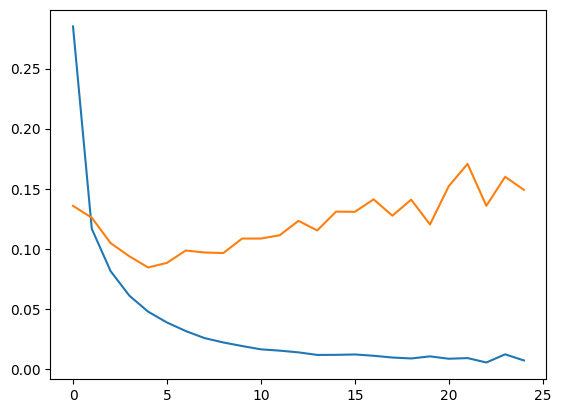

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

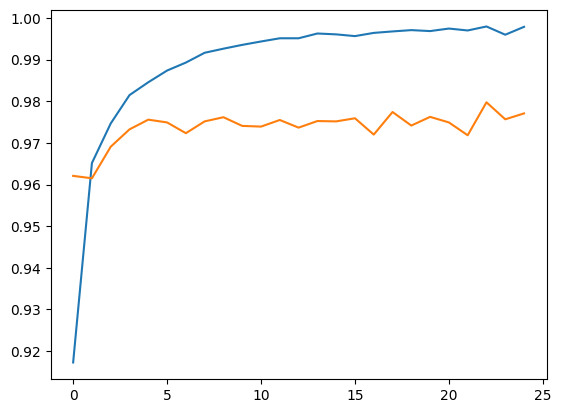

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

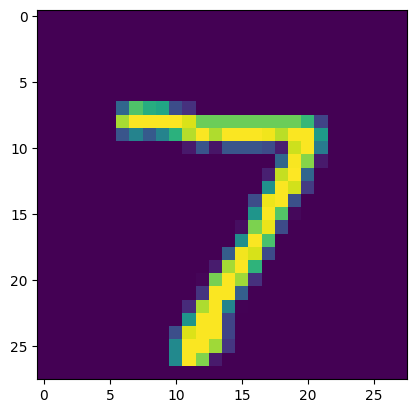

In [35]:
plt.imshow(X_test[0])

In [36]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 48ms/step


array([7], dtype=int64)